In [1]:
%matplotlib inline
# データを取ってスクレイピングする

import pandas

url = 'http://npb.jp/bis/players/01305137.html'  # 察してください



In [2]:
datasets = pandas.io.html.read_html(url)  # データを読む&スクレイピング(たったこれだけ)

In [3]:
# 中身を確認する
len(datasets)  # 長さ

6

In [4]:
datasets[0]  # プロフィール

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,球団サイト選手一覧へ北海道日本ハムファイターズ大谷 翔平11投手2016年7月2日(土) 現...,NaN,北海道日本ハムファイターズ,大谷 翔平,11.0,投手,おおたに・しょうへい,1994年7月5日生 身長193cm 体重92kg 右投 左打,花巻東高,2012年ドラフト1位
1,NaN,北海道日本ハムファイターズ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,大谷 翔平,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,投手,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,おおたに・しょうへい,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1994年7月5日生 身長193cm 体重92kg 右投 左打,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,花巻東高,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2012年ドラフト1位,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
datasets[1]  #  名前とポジション

,0,1
0,NaN,北海道日本ハムファイターズ
1,大谷 翔平,NaN
2,11,投手


In [6]:
datasets[2]  # プロフィール(中々データにありつけない...)

,0
0,おおたに・しょうへい
1,1994年7月5日生 身長193cm 体重92kg 右投 左打
2,花巻東高
3,2012年ドラフト1位


In [7]:
datasets[3]  # 投手成績(ｷﾀ━━━━(ﾟ∀ﾟ)━━━━!!)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,年 度,所属球団,登 板,勝 利,敗 北,セ│ブ,ホ│ル,Ｈ Ｐ,完 投,完封勝,...,安 打,本塁打,四 球,死 球,三 振,暴 投,ボ│ク,失 点,自責点,防御率
1,2013,北海道日本ハム,13,3,0,0,0,0,0,0,...,57,4,33,8,46,2,0,30,29,4.23
2,2014,北海道日本ハム,24,11,4,0,0,0,3,2,...,125,7,57,4,179,6,1,50,45,2.61
3,2015,北海道日本ハム,22,15,5,0,0,0,5,3,...,100,7,46,3,196,9,0,40,40,2.24
4,2016,北海道日本ハム,14,7,4,0,0,0,3,0,...,67,4,35,7,122,4,0,26,23,2.06
5,NaN,通 算,73,36,13,0,0,0,11,5,...,349,22,171,22,543,21,1,146,137,2.58


In [8]:
datasets[4]  # 打撃成績(欲しかったやつｷﾀ━━━━(ﾟ∀ﾟ)━━━━!!)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,年 度,所属球団,試 合,打 席,打 数,得 点,安 打,二塁打,三塁打,本塁打,...,盗塁刺,犠 打,犠 飛,四 球,死 球,三 振,併殺打,打 率,長打率,出塁率
1,2013,北海道日本ハム,77,204,189,14,45,15,1,3,...,1,0,2,12,1,64,3,.238,.376,.284
2,2014,北海道日本ハム,87,234,212,32,58,17,1,10,...,0,0,1,21,0,48,4,.274,.505,.338
3,2015,北海道日本ハム,70,119,109,15,22,4,0,5,...,0,0,2,8,0,43,1,.202,.376,.252
4,2016,北海道日本ハム,44,141,116,25,39,8,0,9,...,0,0,2,22,1,31,2,.336,.638,.440
5,NaN,通 算,278,698,626,86,164,44,2,27,...,1,0,7,63,2,186,10,.262,.468,.328


In [9]:
"""
以下のStatsを年度ごとに比較して打撃の変化を探る
参考： https://ja.wikipedia.org/wiki/野球の各種記録
OPS:出塁率 + 長打率
IsoD:出塁率 - 打率、プラスであればあるほど我慢強い
IsoP:長打率 - 打率、差が大きいと純粋にパワーあふれる打者という判断
BB/K: 四球数 / 三振数 三振一個取られる度に何個四球を奪っているか(1以上が優秀、0.5未満は問題有り)
"""

# バッティング成績だけ取るよ(インデックスは覚えておく)
atbats = datasets[4].drop([0, 5])


In [10]:
# 早速計算してみる、計算結果を列として追加
# 出塁率, 長打率(データ型含め確認)
print(atbats[22])
print(atbats[21])

1    .284
2    .338
3    .252
4    .440
Name: 22, dtype: object
1    .376
2    .505
3    .376
4    .638
Name: 21, dtype: object


In [11]:
# object...のままだと計算出来ないのでキャストしてみる、必要な項目から
import numpy as np
atbats['obp'] = atbats[22].fillna(0).astype(np.float64)  # 出塁率
atbats['slg'] = atbats[21].fillna(0).astype(np.float64)  # 長打率
atbats['ba'] = atbats[20].fillna(0).astype(np.float64)  # 打率
atbats['bb'] = atbats[16].fillna(0).astype(np.float64)  # 四球
atbats['so'] = atbats[18].fillna(0).astype(np.float64)  # 三振

In [12]:
# 計算に必要な項目を出してみる
atbats[['obp', 'slg', 'ba', 'bb', 'so']]

,obp,slg,ba,bb,so
1,0.284,0.376,0.238,12.0,64.0
2,0.338,0.505,0.274,21.0,48.0
3,0.252,0.376,0.202,8.0,43.0
4,0.440,0.638,0.336,22.0,31.0


In [13]:
# 一気に計算して出してみるよ!
atbats['YEAR'] = atbats[0]
atbats['OPS'] = atbats['obp'] + atbats['slg']
atbats['isoD'] = atbats['obp'] - atbats['ba']
atbats['isoP'] = atbats['slg'] - atbats['ba']
atbats['BB/K'] = atbats['bb'] / atbats['so']
atbats[['YEAR', 'OPS', 'isoD', 'isoP', 'BB/K']] 

,YEAR,OPS,isoD,isoP,BB/K
1,2013,0.660,0.046,0.138,0.187500
2,2014,0.843,0.064,0.231,0.437500
3,2015,0.628,0.050,0.174,0.186047
4,2016,1.078,0.104,0.302,0.709677


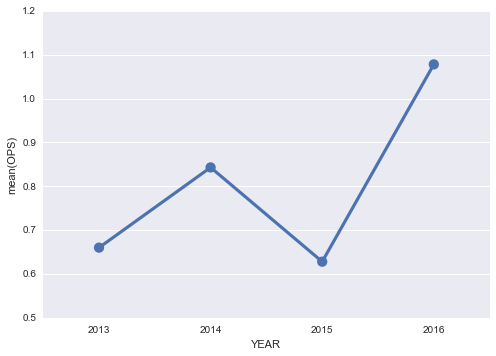

In [14]:
# グラフにしてみる
import seaborn as sns
# OPS
sns.pointplot(x="YEAR", y="OPS", data=atbats)

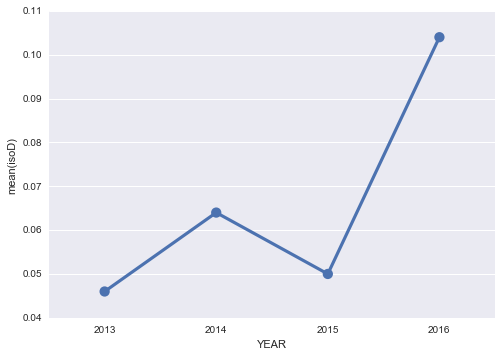

In [15]:
# isoD
sns.pointplot(x="YEAR", y="isoD", data=atbats)

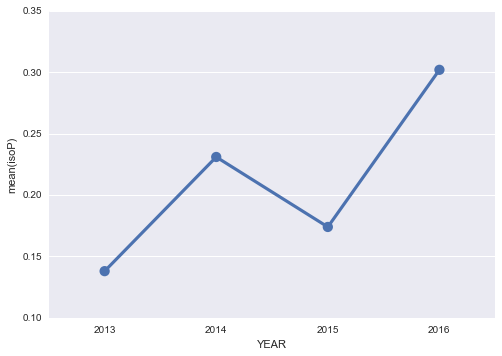

In [16]:
# isoP
sns.pointplot(x="YEAR", y="isoP", data=atbats)

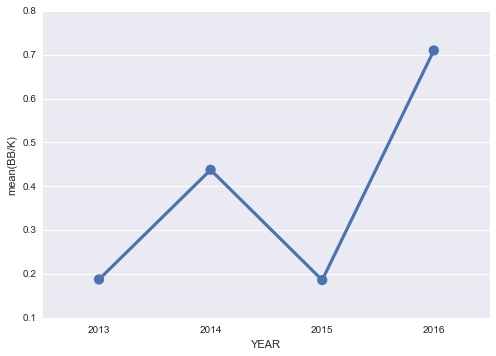

In [17]:
# BB/K
sns.pointplot(x="YEAR", y="BB/K", data=atbats)